## Data Analysis

In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
customers= pd.read_csv('olist_customers_dataset.csv')
geolocation= pd.read_csv('olist_geolocation_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('olist_orders_dataset.csv')
products_dataset = pd.read_csv('olist_products_dataset.csv')
sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name= pd.read_csv('product_category_name_translation.csv')

## 1) Data informations

__Customers Dataset__

This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

- customer_id : key to the orders dataset. Each order has a unique customer_id.

- customer_unique_id: unique identifier of a customer.

- customer_zip_code_prefix: first five digits of customer zip code

- customer_city customer city name

- customer_state customer state

In [3]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
customers.shape

(99441, 5)

In [5]:
customers.duplicated().sum()

0

In [6]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers['customer_unique_id'].nunique()

96096

In [8]:
customers['customer_id'].nunique()

99441

__Geolocation Dataset__

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

The Geolocalisation dataset allows the correspondence between customers custom_state, zip code and city name and sellers. It can be linked to customers by the link that exists between the two datasets and especially the columns customer_zip_code_prefix and geolocation_zip_code_prefix.

- geolocation_zip_code_prefix : first 5 digits of zip code

- geolocation_lat : latitude

- geolocation_lng : longitude

- geolocation_city : city name

- geolocation_state : state

In [9]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [10]:
geolocation.shape

(1000163, 5)

In [11]:
geolocation.duplicated().sum()

261831

In [12]:
geolocation=geolocation.drop_duplicates()

In [13]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
geolocation.duplicated(['geolocation_zip_code_prefix']).sum()

719317

In [15]:
geolocation_zip=geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [16]:
geolocation_zip.shape

(19015, 5)

__Order Items Dataset__

This dataset includes data about the items purchased within each order.

Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

- order_id : order unique identifier
- order_item_id : sequential number identifying number of items included in the same order.
- product_id : product unique identifier
- seller_id : seller unique identifier
- shipping_limit_date : Shows the seller shipping limit date for handling the order over to the logistic partner.
- price : item price
- freight_value : item freight value item (if an order has more than one item the freight value is splitted between items)

In [17]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [18]:
order_items.shape

(112650, 7)

In [19]:
order_items.duplicated().sum()

0

In [20]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

__Payments Dataset__

This dataset includes data about the orders payment options.

- order_id : unique identifier of an order.
- payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type : method of payment chosen by the customer.
- payment_installments : number of installments chosen by the customer.
- payment_value : transaction value.

In [21]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [22]:
order_payments.shape

(103886, 5)

In [23]:
order_payments.duplicated().sum()

0

In [24]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

__Order Reviews Dataset__

This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

- review_id : unique review identifier
- order_id unique order identifier
- review_score : Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title : Comment title from the review left by the customer, in Portuguese.
- review_comment_message : Comment message from the review left by the customer, in Portuguese.
- review_creation_date : Shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp : Shows satisfaction survey answer timestamp

In [25]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [26]:
order_reviews.shape

(100000, 7)

In [27]:
order_reviews.duplicated().sum()

0

In [28]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

__Order Dataset__

This is the core dataset. From each order we might find all other information.

- order_id : unique identifier of the order.
- customer_id : key to the customer dataset. Each order has a unique customer_id.
- order_status : Reference to the order status (delivered, shipped, etc).
- order_purchase_timestamp : Shows the purchase timestamp.
- order_approved_at : Shows the payment approval timestamp.
- order_delivered_carrier_date : Shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date : Shows the actual order delivery date to the customer.
- order_estimated_delivery_date : Shows the estimated delivery date that was informed to customer at the purchase moment.

In [29]:
orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [30]:
orders_dataset.shape

(99441, 8)

In [31]:
orders_dataset.duplicated().sum()

0

In [32]:
orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

__Products Dataset__

This dataset includes data about the products sold by Olist.

- product_id : unique product identifier
- product_category_name : root category of product, in Portuguese.
- product_name_lenght : number of characters extracted from the product name.
- product_description_lenght : number of characters extracted from the product description.
- product_photos_qty : number of product published photos
- product_weight_g : product weight measured in grams.
- product_length_cm : product length measured in centimeters.
- product_height_cm : product height measured in centimeters.
- product_width_cm : product width measured in centimeters.

In [33]:
products_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [34]:
products_dataset.shape

(32951, 9)

In [35]:
products_dataset.duplicated().sum()

0

In [36]:
products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

__Sellers Dataset__

This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

- seller_id : seller unique identifier
- seller_zip_code_prefix : first 5 digits of seller zip code
- seller_city : seller city name
- seller_state : seller state

In [37]:
sellers_dataset.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [38]:
sellers_dataset.shape

(3095, 4)

In [39]:
sellers_dataset.duplicated().sum()

0

In [40]:
sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### Category Name Translation

Translates the productcategoryname to english.

- category name in Portuguese
- category name in English

In [41]:
product_category_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [42]:
product_category_name.shape

(71, 2)

In [43]:
product_category_name.duplicated().sum()

0

In [44]:
product_category_name.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## 2) Merge the dataframes

#### Data schema

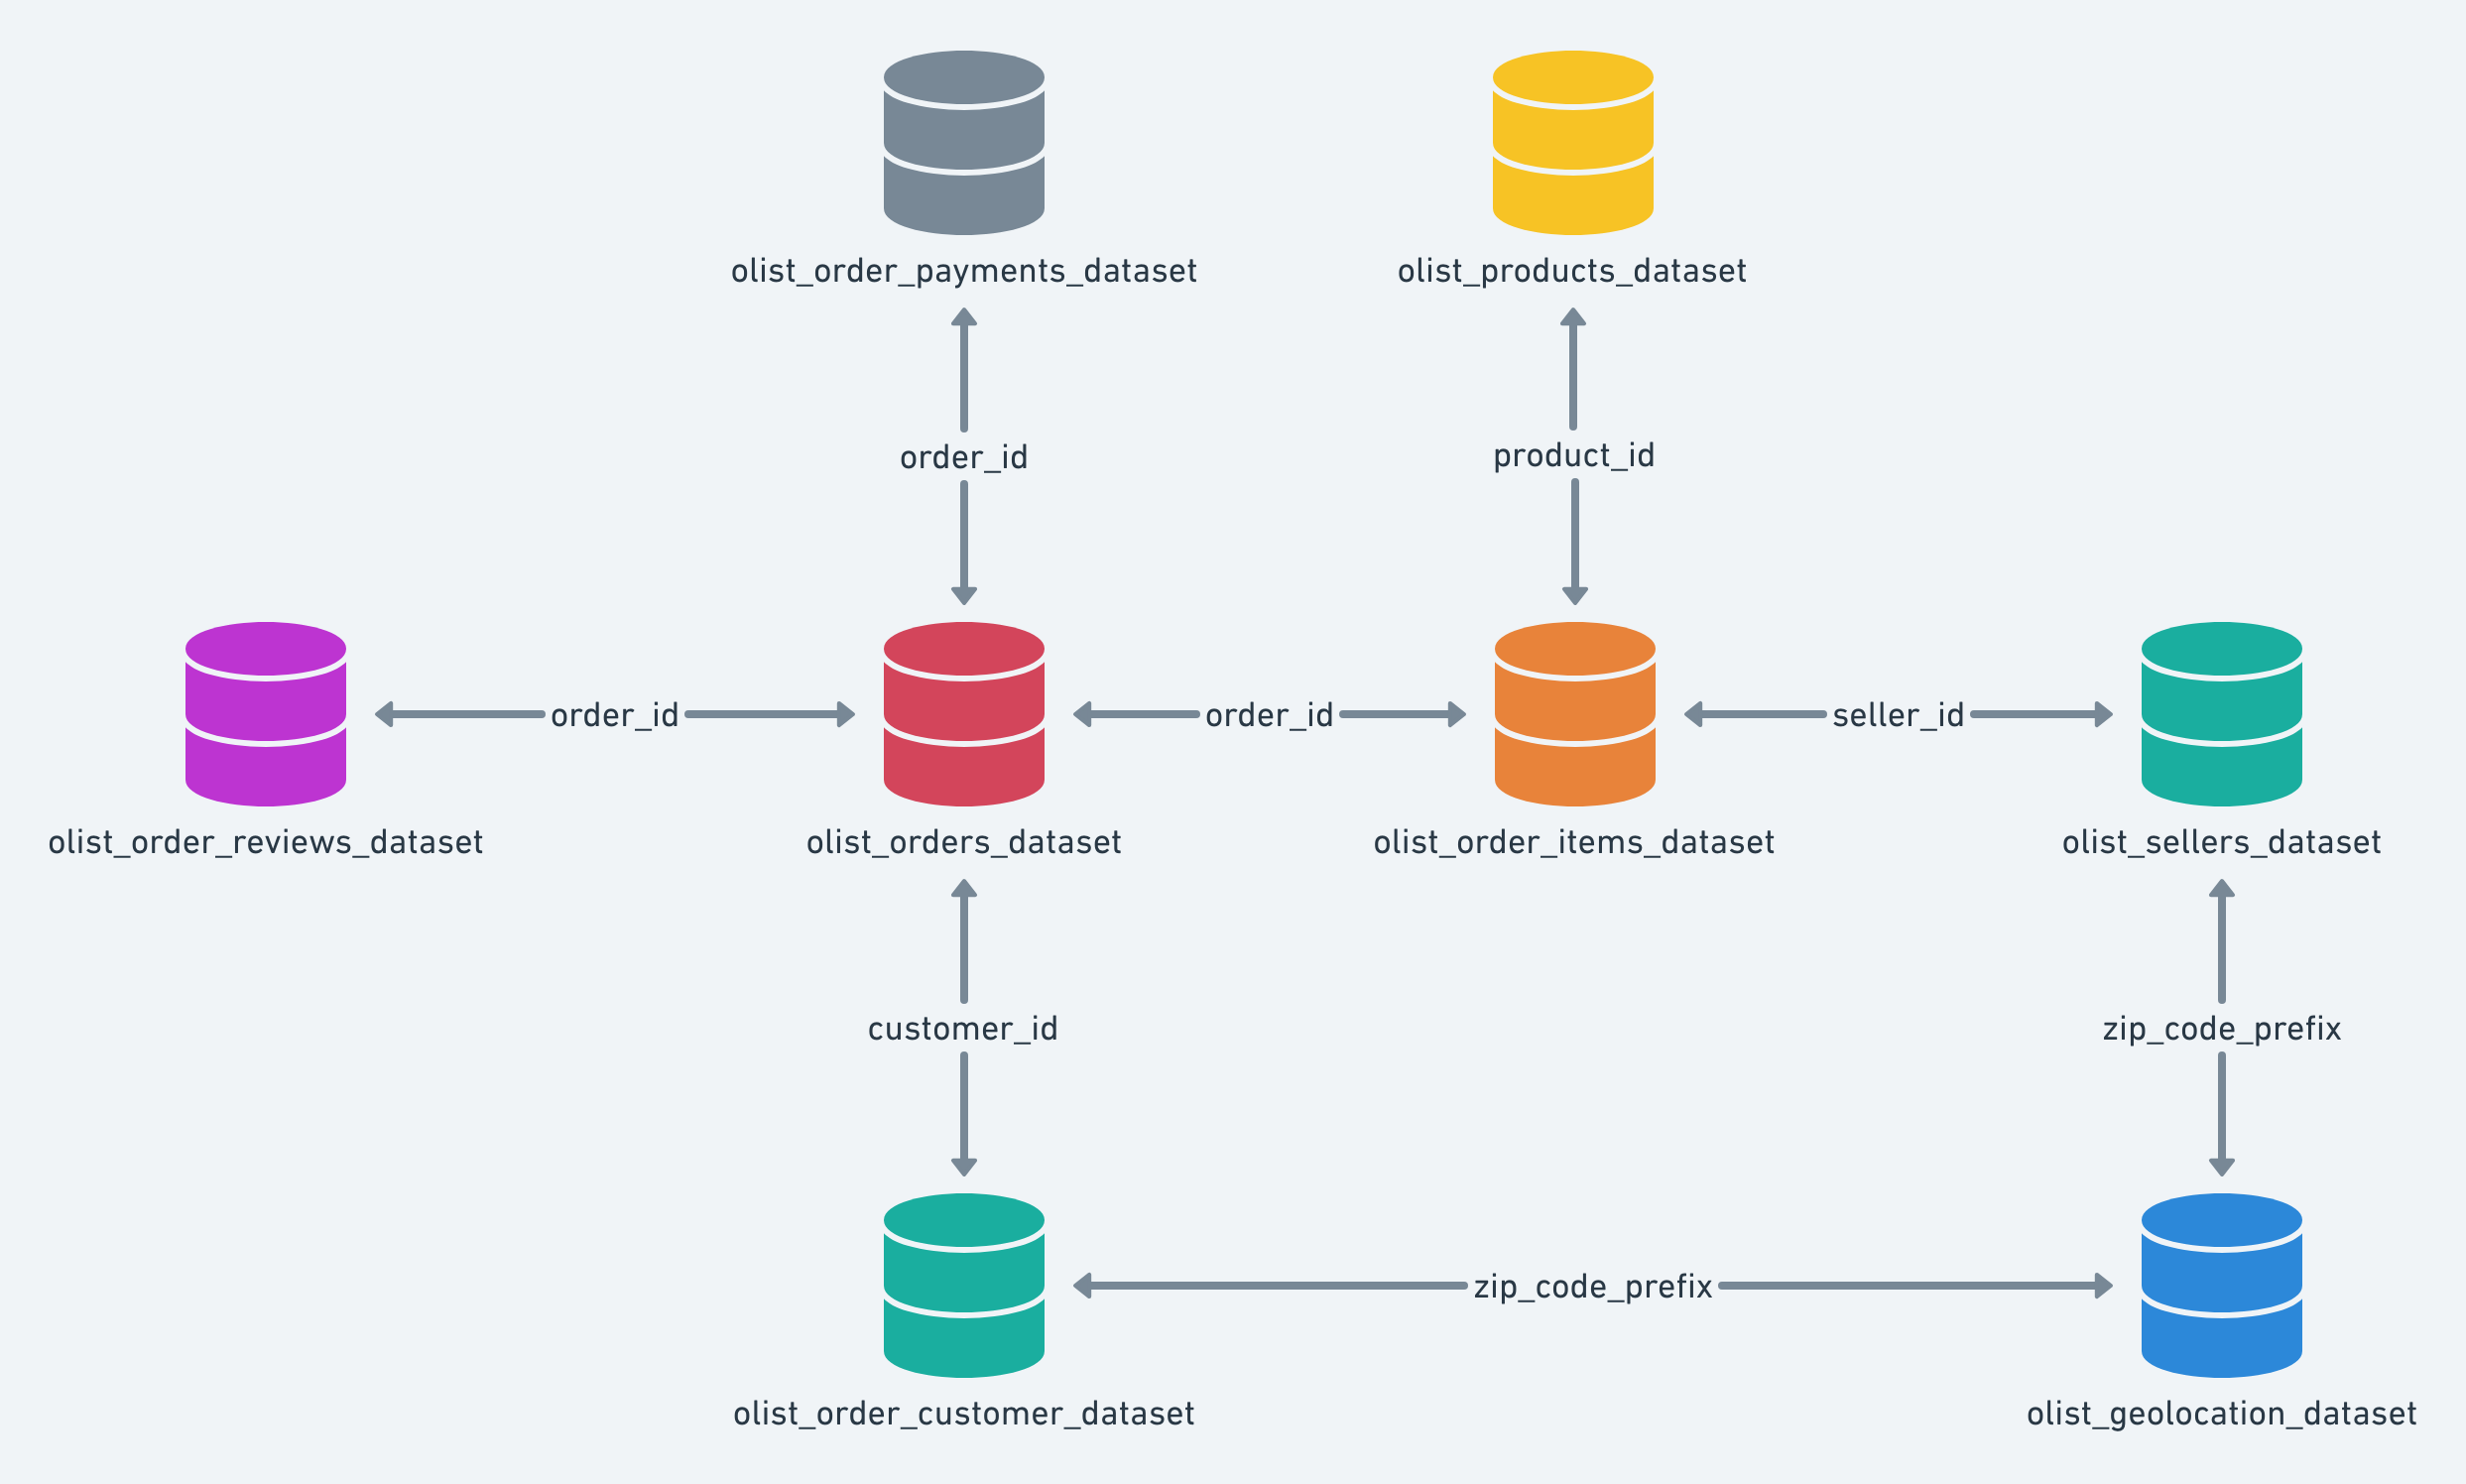

In [45]:
#zip_code_prefix column has different names in customer,sellers dataframes
#Change these names to zip_code_prefix

customers.rename(columns = {"customer_zip_code_prefix":"zip_code_prefix"},inplace=True)
sellers_dataset.rename(columns = {"seller_zip_code_prefix":"zip_code_prefix"},inplace=True)
geolocation_zip.rename(columns = {"geolocation_zip_code_prefix":"zip_code_prefix"},inplace=True)

In [46]:
#customer merging with geo_location (left join to preserve customer info)
geo_customer     = pd.merge(customers,geolocation_zip,how="left",on="zip_code_prefix")

#sellers merging with geo_locations (left join to preserve sellers info)
geo_seller       = pd.merge(sellers_dataset,geolocation_zip,how="left",on="zip_code_prefix")

#payment merging with order
payment_order    = pd.merge(order_payments,orders_dataset,on="order_id")

#product merging with item
product_item     = pd.merge(products_dataset,order_items,on="product_id")

#payment_order merging with reviews
pay_order_review = pd.merge(payment_order,order_reviews,on="order_id")

#pay_order_review merging with geo_customer
review_customer  = pd.merge(pay_order_review,geo_customer,on="customer_id")

#prod_item merging with geo_seller
prod_item_seller = pd.merge(product_item,geo_seller,on="seller_id")

#review_customer with prod_item_seller
review_seller = pd.merge(review_customer,prod_item_seller,on="order_id",suffixes=("_customer","_seller"))

#Finally review_seller with categories
df            =pd.merge(review_seller ,product_category_name,on="product_category_name")

In [47]:
df.shape

(116581, 48)

In [48]:
# to see all the columns
pd.set_option('display.max_columns', None)
df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  b545ba7b0bd67a3128185c7214704319                   1  credit_card   
2  6a26bd1a037993f1205073dbeda67db4                   1  credit_card   
3  1fce50c1831b6809773e5020edc716e2                   1  credit_card   
4  107f069fdb62a9cbe252b043323e4e32                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                     8         340.08  7e2ca73af071679902a9ba14d7c3cee8   
2                     2          67.12  2a44b3dbad360783fd663c15c3e6367c   
3                     2          36.16  1ddcc619647ca008fdc24f8302c8573f   
4                     2         175.13  ef0ce737cbf4c0d6aefb7c7281b658e3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-04-25 22:15:09   
1    delivered      2018-06-11 14:59:24  2018-06-11 16:31:42   
2    delivered      2018-02-15 13:53:42  2018-02-15 14:10:28   
3    delivered      2018-07-24 20:08:54  2018-07-25 20:05:09   
4    delivered      2018-05-18 08:24:28  2018-05-18 08:55:36   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-05-02 15:20:00           2018-05-09 17:36:51   
1          2018-06-12 14:15:00           2018-06-18 16:41:04   
2          2018-02-16 22:38:59           2018-03-02 22:29:04   
3          2018-07-26 16:04:00           2018-07-30 17:20:59   
4          2018-05-24 09:45:00           2018-06-12 18:18:45   

  order_estimated_delivery_date                         review_id  \
0           2018-05-22 00:00:00  4ce650e117a5b292bf5ea980a61eb61e   
1           2018-07-04 00:00:00  5f65ad4b5147b940da2da6802f18bbf7   
2           2018-03-08 00:00:00  fad89f16742c04dcdfec38fd6c115561   
3           2018-08-07 00:00:00  bc0fa803dc47267d440652c24692784d   
4           2018-06-07 00:00:00  4d18eb591789b7687cf69ad6d6d4485c   

   review_score review_comment_title  \
0             1        Não recomendo   
1             4                  NaN   
2             4                  NaN   
3             3                  NaN   
4             5           Não recebi   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...  2018-05-10 00:00:00   
1                                                NaN  2018-06-19 00:00:00   
2    Otimo produto recebir no prazo certo,recomento   2018-03-03 00:00:00   
3                                                NaN  2018-07-31 00:00:00   
4                                         Não recebi  2018-06-09 00:00:00   

  review_answer_timestamp                customer_unique_id  \
0     2018-05-15 23:38:00  708ab75d2a007f0564aedd11139c7708   
1     2018-06-19 20:20:45  55020cb68ae358a51969695657a54e9c   
2     2018-03-04 20:25:59  aca152a8bcfa7d7059b7787c67d60d52   
3     2018-08-01 09:12:07  9aa679326b151fc564c2a238f361aa7d   
4     2018-06-10 06:55:36  2acd1014f0a4e286b0896f30b67c1e80   

   zip_code_prefix_customer    customer_city customer_state  \
0                     39801    teofilo otoni             MG   
1                     15520  valentim gentil             SP   
2                     13295          itupeva             SP   
3                      5678        sao paulo             SP   
4                     79010     campo grande             MS   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -17.851690                -41.493610   
1                -20.421158                -50.086044   
2                -23.159152                -47.058208   
3                -23.597505                -46.704756   
4                -20.442482                -54.607675   

  geolocation_city_customer geolocation_state_customer  \
0             teofilo otoni                         MG   
1           valentim gentil    

In [49]:
df.duplicated().sum()

0

In [50]:
df.drop('product_category_name',axis=1, inplace= True)

In [51]:
df=df.rename(columns={'product_category_name_english':'product_category_name'})

#### Making new csv file

In [52]:
df.to_csv('data_olist.csv', index=False)

## 3) Exploratory Data Analysis

### 3.1 Map

In [54]:
geolocation= pd.read_csv('olist_geolocation_dataset.csv')

In [55]:
# Drop duplicated geolocation_lat
geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'],keep='last', inplace=True)

In [56]:
geolocation_zip.keys()

Index(['zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [57]:
import folium
import folium.plugins

#Coordonnées du centre de Seattle
brz_lat = -23
brz_lon = -46
brz_map = folium.Map(location=[brz_lat, brz_lon], zoom_start=4)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(brz_map)
for lat, lon, in zip(geolocation.geolocation_lat, geolocation.geolocation_lng):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

brz_map

### Distance between customers and sellers

In [58]:
data= pd.read_csv('data_olist.csv')

In [59]:
data.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  b545ba7b0bd67a3128185c7214704319                   1  credit_card   
2  6a26bd1a037993f1205073dbeda67db4                   1  credit_card   
3  1fce50c1831b6809773e5020edc716e2                   1  credit_card   
4  107f069fdb62a9cbe252b043323e4e32                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                     8         340.08  7e2ca73af071679902a9ba14d7c3cee8   
2                     2          67.12  2a44b3dbad360783fd663c15c3e6367c   
3                     2          36.16  1ddcc619647ca008fdc24f8302c8573f   
4                     2         175.13  ef0ce737cbf4c0d6aefb7c7281b658e3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-04-25 22:15:09   
1    delivered      2018-06-11 14:59:24  2018-06-11 16:31:42   
2    delivered      2018-02-15 13:53:42  2018-02-15 14:10:28   
3    delivered      2018-07-24 20:08:54  2018-07-25 20:05:09   
4    delivered      2018-05-18 08:24:28  2018-05-18 08:55:36   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-05-02 15:20:00           2018-05-09 17:36:51   
1          2018-06-12 14:15:00           2018-06-18 16:41:04   
2          2018-02-16 22:38:59           2018-03-02 22:29:04   
3          2018-07-26 16:04:00           2018-07-30 17:20:59   
4          2018-05-24 09:45:00           2018-06-12 18:18:45   

  order_estimated_delivery_date                         review_id  \
0           2018-05-22 00:00:00  4ce650e117a5b292bf5ea980a61eb61e   
1           2018-07-04 00:00:00  5f65ad4b5147b940da2da6802f18bbf7   
2           2018-03-08 00:00:00  fad89f16742c04dcdfec38fd6c115561   
3           2018-08-07 00:00:00  bc0fa803dc47267d440652c24692784d   
4           2018-06-07 00:00:00  4d18eb591789b7687cf69ad6d6d4485c   

   review_score review_comment_title  \
0             1        Não recomendo   
1             4                  NaN   
2             4                  NaN   
3             3                  NaN   
4             5           Não recebi   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...  2018-05-10 00:00:00   
1                                                NaN  2018-06-19 00:00:00   
2    Otimo produto recebir no prazo certo,recomento   2018-03-03 00:00:00   
3                                                NaN  2018-07-31 00:00:00   
4                                         Não recebi  2018-06-09 00:00:00   

  review_answer_timestamp                customer_unique_id  \
0     2018-05-15 23:38:00  708ab75d2a007f0564aedd11139c7708   
1     2018-06-19 20:20:45  55020cb68ae358a51969695657a54e9c   
2     2018-03-04 20:25:59  aca152a8bcfa7d7059b7787c67d60d52   
3     2018-08-01 09:12:07  9aa679326b151fc564c2a238f361aa7d   
4     2018-06-10 06:55:36  2acd1014f0a4e286b0896f30b67c1e80   

   zip_code_prefix_customer    customer_city customer_state  \
0                     39801    teofilo otoni             MG   
1                     15520  valentim gentil             SP   
2                     13295          itupeva             SP   
3                      5678        sao paulo             SP   
4                     79010     campo grande             MS   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -17.851690                -41.493610   
1                -20.421158                -50.086044   
2                -23.159152                -47.058208   
3                -23.597505                -46.704756   
4                -20.442482                -54.607675   

  geolocation_city_customer geolocation_state_customer  \
0             teofilo otoni                         MG   
1           valentim gentil    

In [60]:
distance_sc = data[['customer_unique_id', 'order_id']].copy()

In [61]:
distance_sc['distance_btw_sell_cust_km']=\
                                 sqrt((data ['geolocation_lat_customer']-data['geolocation_lat_seller'])**2 
                                    + (data['geolocation_lng_customer']- data['geolocation_lng_seller'])**2)
distance_sc

customer_unique_id                          order_id  \
0       708ab75d2a007f0564aedd11139c7708  b81ef226f3fe1789b1e8b2acac839d17   
1       55020cb68ae358a51969695657a54e9c  b545ba7b0bd67a3128185c7214704319   
2       aca152a8bcfa7d7059b7787c67d60d52  6a26bd1a037993f1205073dbeda67db4   
3       9aa679326b151fc564c2a238f361aa7d  1fce50c1831b6809773e5020edc716e2   
4       2acd1014f0a4e286b0896f30b67c1e80  107f069fdb62a9cbe252b043323e4e32   
...                                  ...                               ...   
116576  a1d53377ab83871b0ad483b03ac69d6c  b99217b1fcf2fdeace7b8d869b76cb91   
116577  1f83c87997168e248ea52ad3453b069f  3da4b0f0c89bb8fee8a810459e641414   
116578  93d9e516a351a7747fc9830ae9525062  3be3bae6f665380f803dc59c9053cf26   
116579  27558f96bc671d0594c60be61566aeb4  cab08f0417a702d0f4782ec02356a4ac   
116580  1b553902a5bbe6ee54a3aaa7cbfb6816  ee86b68eb9222b0cad7da50f4f758a35   

        distance_btw_sell_cust_km  
0                        7.881402  
1                        4.727825  
2                        0.627855  
3                        2.627220  
4                        8.620263  
...                           ...  
116576                   8.019542  
116577                   0.069897  
116578                   9.779971  
116579                  11.246044  
116580                   3.362385  

[116581 rows x 3 columns]

In [62]:
distance_sc['distance_btw_sell_cust_km'].isnull().sum()

574

### 3. Exploratory data analysis 

We will go through an exploratory data analysis to get insights from E-Commerce in Brazil. The aim here is to divide this dataset into topics so we can explore visualisation for each dataset (orders, customers, products, items, and others)

In [63]:
pd.set_option('display.max_columns', None)
data.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  b545ba7b0bd67a3128185c7214704319                   1  credit_card   
2  6a26bd1a037993f1205073dbeda67db4                   1  credit_card   
3  1fce50c1831b6809773e5020edc716e2                   1  credit_card   
4  107f069fdb62a9cbe252b043323e4e32                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                     8         340.08  7e2ca73af071679902a9ba14d7c3cee8   
2                     2          67.12  2a44b3dbad360783fd663c15c3e6367c   
3                     2          36.16  1ddcc619647ca008fdc24f8302c8573f   
4                     2         175.13  ef0ce737cbf4c0d6aefb7c7281b658e3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-04-25 22:15:09   
1    delivered      2018-06-11 14:59:24  2018-06-11 16:31:42   
2    delivered      2018-02-15 13:53:42  2018-02-15 14:10:28   
3    delivered      2018-07-24 20:08:54  2018-07-25 20:05:09   
4    delivered      2018-05-18 08:24:28  2018-05-18 08:55:36   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-05-02 15:20:00           2018-05-09 17:36:51   
1          2018-06-12 14:15:00           2018-06-18 16:41:04   
2          2018-02-16 22:38:59           2018-03-02 22:29:04   
3          2018-07-26 16:04:00           2018-07-30 17:20:59   
4          2018-05-24 09:45:00           2018-06-12 18:18:45   

  order_estimated_delivery_date                         review_id  \
0           2018-05-22 00:00:00  4ce650e117a5b292bf5ea980a61eb61e   
1           2018-07-04 00:00:00  5f65ad4b5147b940da2da6802f18bbf7   
2           2018-03-08 00:00:00  fad89f16742c04dcdfec38fd6c115561   
3           2018-08-07 00:00:00  bc0fa803dc47267d440652c24692784d   
4           2018-06-07 00:00:00  4d18eb591789b7687cf69ad6d6d4485c   

   review_score review_comment_title  \
0             1        Não recomendo   
1             4                  NaN   
2             4                  NaN   
3             3                  NaN   
4             5           Não recebi   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...  2018-05-10 00:00:00   
1                                                NaN  2018-06-19 00:00:00   
2    Otimo produto recebir no prazo certo,recomento   2018-03-03 00:00:00   
3                                                NaN  2018-07-31 00:00:00   
4                                         Não recebi  2018-06-09 00:00:00   

  review_answer_timestamp                customer_unique_id  \
0     2018-05-15 23:38:00  708ab75d2a007f0564aedd11139c7708   
1     2018-06-19 20:20:45  55020cb68ae358a51969695657a54e9c   
2     2018-03-04 20:25:59  aca152a8bcfa7d7059b7787c67d60d52   
3     2018-08-01 09:12:07  9aa679326b151fc564c2a238f361aa7d   
4     2018-06-10 06:55:36  2acd1014f0a4e286b0896f30b67c1e80   

   zip_code_prefix_customer    customer_city customer_state  \
0                     39801    teofilo otoni             MG   
1                     15520  valentim gentil             SP   
2                     13295          itupeva             SP   
3                      5678        sao paulo             SP   
4                     79010     campo grande             MS   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -17.851690                -41.493610   
1                -20.421158                -50.086044   
2                -23.159152                -47.058208   
3                -23.597505                -46.704756   
4                -20.442482                -54.607675   

  geolocation_city_customer geolocation_state_customer  \
0             teofilo otoni                         MG   
1           valentim gentil    

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   payment_sequential             116581 non-null  int64  
 2   payment_type                   116581 non-null  object 
 3   payment_installments           116581 non-null  int64  
 4   payment_value                  116581 non-null  float64
 5   customer_id                    116581 non-null  object 
 6   order_status                   116581 non-null  object 
 7   order_purchase_timestamp       116581 non-null  object 
 8   order_approved_at              116567 non-null  object 
 9   order_delivered_carrier_date   115368 non-null  object 
 10  order_delivered_customer_date  114066 non-null  object 
 11  order_estimated_delivery_date  116581 non-null  object 
 12  review_id                     

#### To change the type of some columns

- customers :

there are more unique values for customer_id than for customer_unique_id (assumption: customer_unique_id corresponds to the number of customers and customer_id corresponds to the customer id for each order. Thus, customers could make several orders with the same unique id but with different customer_id for different orders).

- The customers zip_code & zip_code_prefix_seller should not be an int but an object.
- order_item_id should not be an int but an object
- payment_sequential and payment_installments not int set to object (category)
- order_id : different number than in the order dataset.
- order_review :
- review_score : not int but object (category)

- order_purchase_timestamp : to put in date format
- review_creation_date : to be set in date format


In [65]:
data['zip_code_prefix_customer'] = data['zip_code_prefix_customer'].apply(str)
data['zip_code_prefix_seller'] = data['zip_code_prefix_seller'].apply(str)
data['order_item_id'] = data['order_item_id'].apply(str)
data['payment_sequential'] = data['payment_sequential'].apply(str)
data['payment_installments'] = data['payment_installments'].apply(str)

data['review_score'] = data['review_score'].apply(str)

#lets change the datetime features to correct format
data["order_purchase_timestamp"]       = pd.to_datetime(data["order_purchase_timestamp"])
data["review_creation_date"]            = pd.to_datetime(data["review_creation_date"])

### 3.2  Ecommerce by Region, State

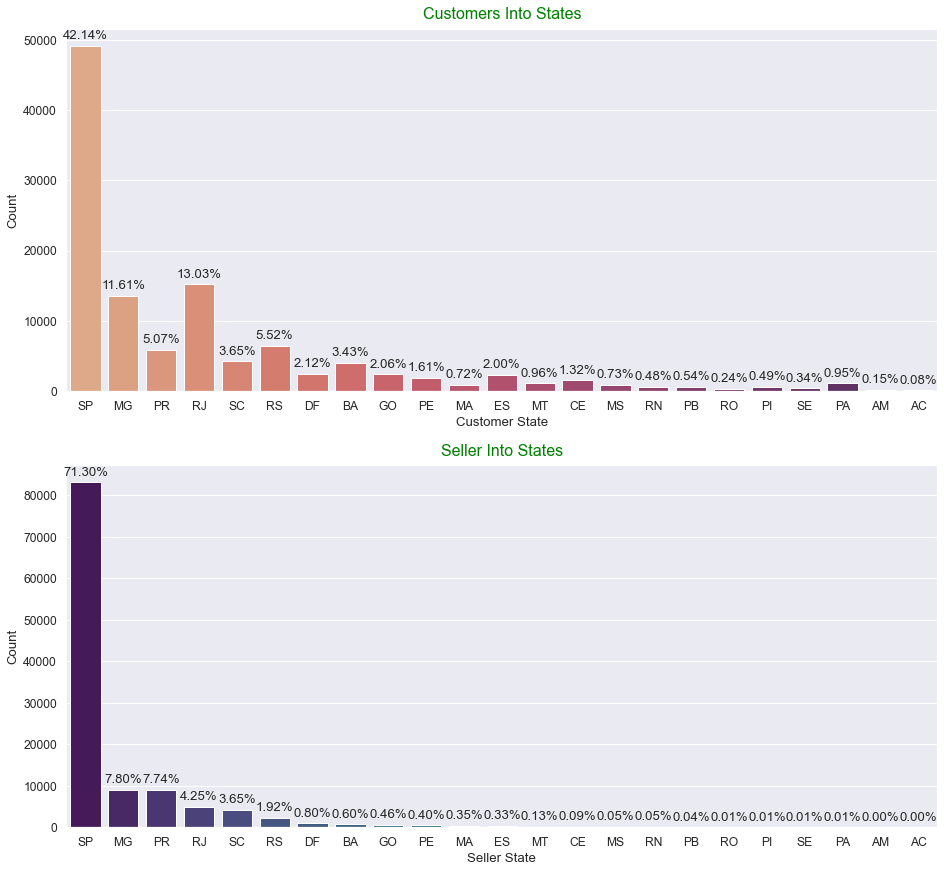

In [66]:
sns.set(font_scale=1.1)
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

sns.countplot(x=data['customer_state'], ax=ax1, palette='flare', order = data['seller_state'].value_counts().index)
total = len(data['customer_state'])
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Customers Into States', size=16, color='green', pad=10)
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Count')

sns.countplot(x=data['seller_state'], ax=ax2, palette='viridis', order = data['seller_state'].value_counts().index)
total = len(data['seller_state'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Seller Into States', size=16, color='green', pad=10)
ax2.set_xlabel('Seller State')
ax2.set_ylabel('Count')

plt.savefig("customer_seller_state.png")

### 3.3 Order

#### Total Orders on E-Commerce

Looking at the order dataset columns, we can see orders with different status and with different timestamp columns like purchase, approved, delivered and estimated delivery. First, let's look at the status of the orders we have in this dataset.

In [67]:
data["order_status"].value_counts()

delivered      114067
shipped          1225
canceled          553
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64

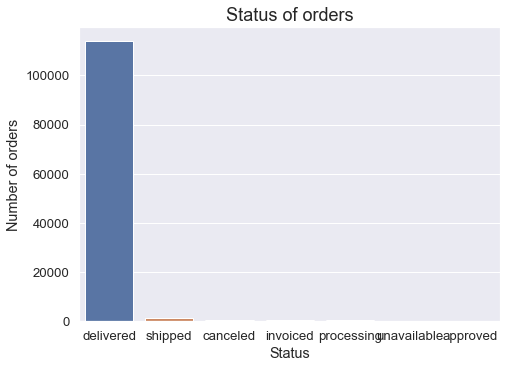

In [68]:
sns.set(font_scale=1.2)
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

plt.subplot(121)
sns.countplot(data= data, x='order_status')
plt.xlabel("Status")
plt.ylabel("Number of orders")
plt.title("Status of orders", size=18)

plt.savefig("order_status.png")

A majority of the orders in the database are delivered products , while some are in transit.

In [69]:
# Extracting attributes for purchase date - Year and Month
data['order_purchase_year'] = data['order_purchase_timestamp'].apply(lambda x: x.year)
data['order_purchase_month'] = data['order_purchase_timestamp'].apply(lambda x: x.month)
data['order_purchase_month_name'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
data['order_purchase_year_month'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
data['order_purchase_date'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [70]:
data.head()

order_id payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                  1  credit_card   
1  b545ba7b0bd67a3128185c7214704319                  1  credit_card   
2  6a26bd1a037993f1205073dbeda67db4                  1  credit_card   
3  1fce50c1831b6809773e5020edc716e2                  1  credit_card   
4  107f069fdb62a9cbe252b043323e4e32                  1  credit_card   

  payment_installments  payment_value                       customer_id  \
0                    8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                    8         340.08  7e2ca73af071679902a9ba14d7c3cee8   
2                    2          67.12  2a44b3dbad360783fd663c15c3e6367c   
3                    2          36.16  1ddcc619647ca008fdc24f8302c8573f   
4                    2         175.13  ef0ce737cbf4c0d6aefb7c7281b658e3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-04-25 22:15:09   
1    delivered      2018-06-11 14:59:24  2018-06-11 16:31:42   
2    delivered      2018-02-15 13:53:42  2018-02-15 14:10:28   
3    delivered      2018-07-24 20:08:54  2018-07-25 20:05:09   
4    delivered      2018-05-18 08:24:28  2018-05-18 08:55:36   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-05-02 15:20:00           2018-05-09 17:36:51   
1          2018-06-12 14:15:00           2018-06-18 16:41:04   
2          2018-02-16 22:38:59           2018-03-02 22:29:04   
3          2018-07-26 16:04:00           2018-07-30 17:20:59   
4          2018-05-24 09:45:00           2018-06-12 18:18:45   

  order_estimated_delivery_date                         review_id  \
0           2018-05-22 00:00:00  4ce650e117a5b292bf5ea980a61eb61e   
1           2018-07-04 00:00:00  5f65ad4b5147b940da2da6802f18bbf7   
2           2018-03-08 00:00:00  fad89f16742c04dcdfec38fd6c115561   
3           2018-08-07 00:00:00  bc0fa803dc47267d440652c24692784d   
4           2018-06-07 00:00:00  4d18eb591789b7687cf69ad6d6d4485c   

  review_score review_comment_title  \
0            1        Não recomendo   
1            4                  NaN   
2            4                  NaN   
3            3                  NaN   
4            5           Não recebi   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...           2018-05-10   
1                                                NaN           2018-06-19   
2    Otimo produto recebir no prazo certo,recomento            2018-03-03   
3                                                NaN           2018-07-31   
4                                         Não recebi           2018-06-09   

  review_answer_timestamp                customer_unique_id  \
0     2018-05-15 23:38:00  708ab75d2a007f0564aedd11139c7708   
1     2018-06-19 20:20:45  55020cb68ae358a51969695657a54e9c   
2     2018-03-04 20:25:59  aca152a8bcfa7d7059b7787c67d60d52   
3     2018-08-01 09:12:07  9aa679326b151fc564c2a238f361aa7d   
4     2018-06-10 06:55:36  2acd1014f0a4e286b0896f30b67c1e80   

  zip_code_prefix_customer    customer_city customer_state  \
0                    39801    teofilo otoni             MG   
1                    15520  valentim gentil             SP   
2                    13295          itupeva             SP   
3                     5678        sao paulo             SP   
4                    79010     campo grande             MS   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -17.851690                -41.493610   
1                -20.421158                -50.086044   
2                -23.159152                -47.058208   
3                -23.597505                -46.704756   
4                -20.442482                -54.607675   

  geolocation_city_customer geolocation_state_customer  \
0             teofilo otoni                         MG   
1           valentim gentil                         SP 

we have to extract some info on the order_purchase_timestamp by following:
- Transform timestamp columns;
- Extract time attributes from these datetime columns (year, month, day, day of week and hour);
- Evaluate the e-commerce scenario using this attributes.

In [71]:
# Extracting attributes for purchase date - Day and Day of Week
data['order_purchase_day'] = data['order_purchase_timestamp'].apply(lambda x: x.day)
data['order_purchase_dayofweek'] = data['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
data['order_purchase_dayofweek_name'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

In [72]:
data['order_purchase_year_month'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
data['order_purchase_date'] = data['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [73]:
# Extracting attributes for purchase date - Hour and Time of the Day
data['order_purchase_hour'] = data['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
data['order_purchase_time_day'] = pd.cut(data['order_purchase_hour'], hours_bins, labels = hours_labels)

In [74]:
data.head()

order_id payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                  1  credit_card   
1  b545ba7b0bd67a3128185c7214704319                  1  credit_card   
2  6a26bd1a037993f1205073dbeda67db4                  1  credit_card   
3  1fce50c1831b6809773e5020edc716e2                  1  credit_card   
4  107f069fdb62a9cbe252b043323e4e32                  1  credit_card   

  payment_installments  payment_value                       customer_id  \
0                    8          99.33  0a8556ac6be836b46b3e89920d59291c   
1                    8         340.08  7e2ca73af071679902a9ba14d7c3cee8   
2                    2          67.12  2a44b3dbad360783fd663c15c3e6367c   
3                    2          36.16  1ddcc619647ca008fdc24f8302c8573f   
4                    2         175.13  ef0ce737cbf4c0d6aefb7c7281b658e3   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-25 22:01:49  2018-04-25 22:15:09   
1    delivered      2018-06-11 14:59:24  2018-06-11 16:31:42   
2    delivered      2018-02-15 13:53:42  2018-02-15 14:10:28   
3    delivered      2018-07-24 20:08:54  2018-07-25 20:05:09   
4    delivered      2018-05-18 08:24:28  2018-05-18 08:55:36   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-05-02 15:20:00           2018-05-09 17:36:51   
1          2018-06-12 14:15:00           2018-06-18 16:41:04   
2          2018-02-16 22:38:59           2018-03-02 22:29:04   
3          2018-07-26 16:04:00           2018-07-30 17:20:59   
4          2018-05-24 09:45:00           2018-06-12 18:18:45   

  order_estimated_delivery_date                         review_id  \
0           2018-05-22 00:00:00  4ce650e117a5b292bf5ea980a61eb61e   
1           2018-07-04 00:00:00  5f65ad4b5147b940da2da6802f18bbf7   
2           2018-03-08 00:00:00  fad89f16742c04dcdfec38fd6c115561   
3           2018-08-07 00:00:00  bc0fa803dc47267d440652c24692784d   
4           2018-06-07 00:00:00  4d18eb591789b7687cf69ad6d6d4485c   

  review_score review_comment_title  \
0            1        Não recomendo   
1            4                  NaN   
2            4                  NaN   
3            3                  NaN   
4            5           Não recebi   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...           2018-05-10   
1                                                NaN           2018-06-19   
2    Otimo produto recebir no prazo certo,recomento            2018-03-03   
3                                                NaN           2018-07-31   
4                                         Não recebi           2018-06-09   

  review_answer_timestamp                customer_unique_id  \
0     2018-05-15 23:38:00  708ab75d2a007f0564aedd11139c7708   
1     2018-06-19 20:20:45  55020cb68ae358a51969695657a54e9c   
2     2018-03-04 20:25:59  aca152a8bcfa7d7059b7787c67d60d52   
3     2018-08-01 09:12:07  9aa679326b151fc564c2a238f361aa7d   
4     2018-06-10 06:55:36  2acd1014f0a4e286b0896f30b67c1e80   

  zip_code_prefix_customer    customer_city customer_state  \
0                    39801    teofilo otoni             MG   
1                    15520  valentim gentil             SP   
2                    13295          itupeva             SP   
3                     5678        sao paulo             SP   
4                    79010     campo grande             MS   

   geolocation_lat_customer  geolocation_lng_customer  \
0                -17.851690                -41.493610   
1                -20.421158                -50.086044   
2                -23.159152                -47.058208   
3                -23.597505                -46.704756   
4                -20.442482                -54.607675   

  geolocation_city_customer geolocation_state_customer  \
0             teofilo otoni                         MG   
1           valentim gentil                         SP 

In [75]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def single_countplot(df, ax, x=None, y=None, order=True, hue=False, palette='plasma', width=0.75, sub_width=0.3,
                     sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """
    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

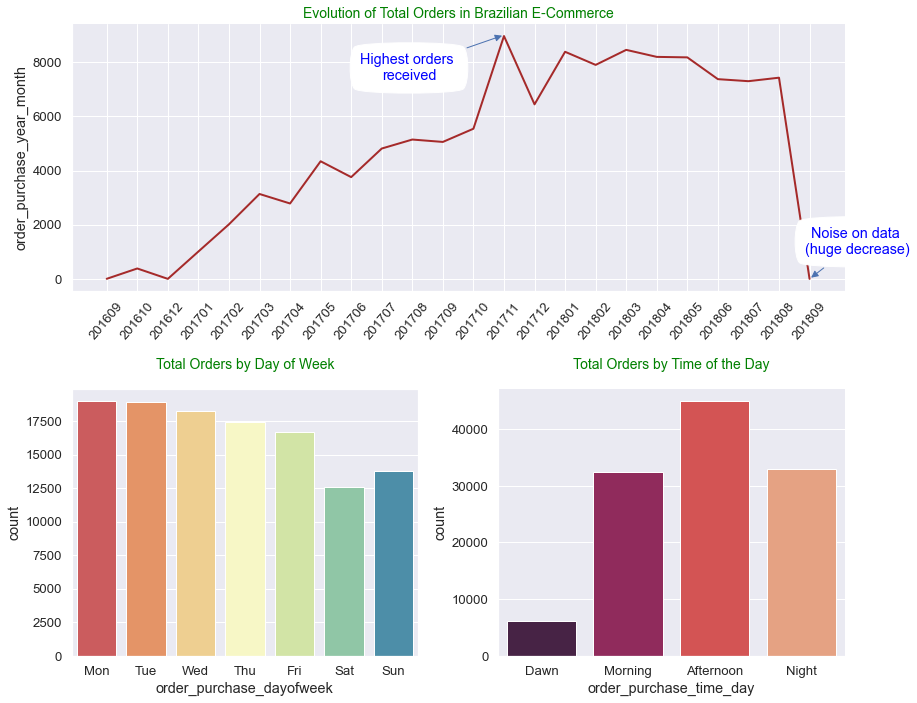

In [76]:
sns.set(font_scale=1.2)
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

#Import package for plotting
from matplotlib.gridspec import GridSpec

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=data['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='brown', linewidth=2)

ax1.annotate(f'Highest orders \nreceived', (13, 9000), xytext=(-95, -45), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', ec="b"), color='blue', ha='center')

ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', ec="b"), color='blue', ha='center')

#format_spines(ax1, right_border=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for tick in ax1.get_xticklabels():
    tick.set_rotation(50)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='green')

# Barchart - Total of orders by day of week
single_countplot(data, x='order_purchase_dayofweek', ax=ax2, order=False, palette='Spectral')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='green', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Barchart - Total of orders by time of the day
single_countplot(data, x='order_purchase_time_day', ax=ax3, order=False, palette='rocket')
ax3.set_title('Total Orders by Time of the Day', size=14, color='green', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Total Orders by Time of the Day.png")

- E-commerce on Brazil has a growing trend along the time.
- We can see a peak on November due to Black Friday
- Sales are weak on Dec(holidays), but in general customers are buying more than before.
- Monday's are the most prefered day for customers and they buy more in the afternoons.
- As we can see a sharp decrease between August 2018 and September 2018, that maybe because of noise in data.

#### To compare 2017 and 2018 Year, we will just consider orders between January and August in both years to see the sharp decline in orders

In [77]:
data['order_purchase_year'] = data['order_purchase_timestamp'].apply(lambda x: x.year)
data['order_purchase_month'] = data['order_purchase_timestamp'].apply(lambda x: x.month)

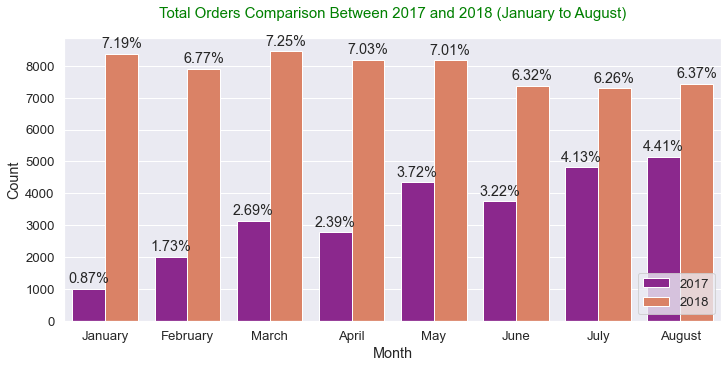

In [78]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(10, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax2 = fig.add_subplot()

# Bar chart - Comparison between monthly sales between 2017 and 2018
data_compare = data.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
single_countplot(data_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False)
total = len(data['order_purchase_month'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=15, color='green', pad=20)
ax2.set_xticklabels(month_label)
plt.legend(loc='lower right')
plt.xlabel('Month')
plt.ylabel('Count')

plt.savefig("Total Orders Comparison.png")

In [79]:
# Annotation - Grown on e-commerce orders between 2017 and 2018
data_compare = data.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = data_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))

print('Total orders in 06/2017 - 12/2017 is ', year_orders[2017])
print('Total orders in 06/2018 - 12/2018 is ', year_orders[2018])
print('\nThe growth of order is ', growth,'%')

Total orders in 06/2017 - 12/2017 is  26992
Total orders in 06/2018 - 12/2018 is  63198

The growth of order is  143 %


### 3.4 Product

Most Bought Product Category People Usually Order:

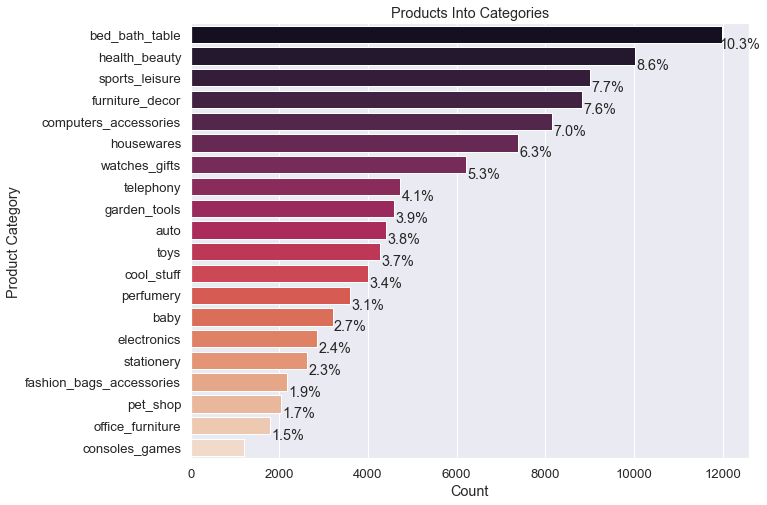

In [91]:

fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(y=data['product_category_name'], palette='rocket',
                   order = data['product_category_name'].value_counts().index[:20])
total = len(data['product_category_name'])
for p in ax.patches:
    x = (p.get_width() + 400)
    y = (p.get_y() + p.get_height()/2) + .9
    ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Into Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

plt.savefig('Products.png')

###  3.5 payment

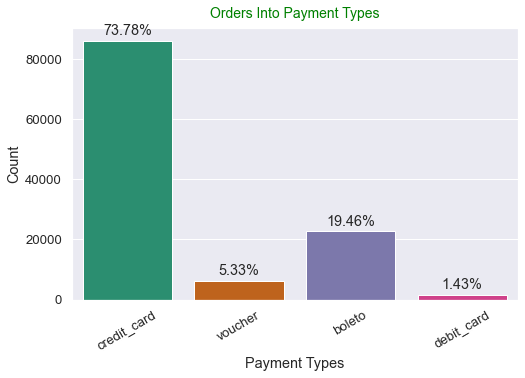

In [92]:
fig = plt.figure(figsize=(8, 5))
ax = sns.countplot(x=data['payment_type'], palette='Dark2')
total = len(data['payment_type'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Orders Into Payment Types', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel('Payment Types')

plt.savefig('Products.png')

###  3.6 review_score

Text(0.5, 1.0, 'Review the customers by their satisfaction.png')

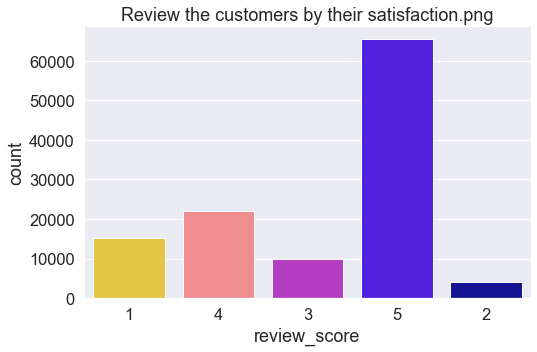

In [93]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,5))

ax=sns.countplot(x="review_score", data= data, palette="gnuplot2_r")

plt.title('Review the customers by their satisfaction.png')

In [94]:
data.to_csv('data_feature_eng.csv', index=False)